In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.9.2


In [3]:
batch_size=128
num_class=10


In [4]:
IMG_HEIGHT=28
IMG_WIDTH=28

In [5]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train=x_train.reshape(x_train.shape[0],IMG_HEIGHT,IMG_WIDTH,1)
x_test=x_test.reshape(x_test.shape[0],IMG_HEIGHT,IMG_WIDTH,1)

input_shape=(IMG_HEIGHT,IMG_WIDTH,1)

In [7]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

In [8]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                              input_shape=input_shape,name='input_layer'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_1'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Dropout(0.25,name='dropout_1'))

model.add(tf.keras.layers.Flatten(name='flate_1'))

model.add(tf.keras.layers.Dense(128,activation='relu',name='dense_1'))
model.add(tf.keras.layers.Dropout(0.5,name='dropout_2'))

model.add(tf.keras.layers.Dense(num_class,activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 26, 26, 32)        320       
                                                                 
 conv_1 (Conv2D)             (None, 24, 24, 64)        18496     
                                                                 
 pool_1 (MaxPooling2D)       (None, 12, 12, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flate_1 (Flatten)           (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [9]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])


In [10]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 162s 343ms/step - loss: 0.2435 - accuracy: 0.9247 - val_loss: 0.0528 - val_accuracy: 0.9831
Epoch 2/5
469/469 [==============================] - 157s 335ms/step - loss: 0.0857 - accuracy: 0.9744 - val_loss: 0.0392 - val_accuracy: 0.9869
Epoch 3/5
469/469 [==============================] - 156s 333ms/step - loss: 0.0654 - accuracy: 0.9797 - val_loss: 0.0343 - val_accuracy: 0.9879
Epoch 4/5
469/469 [==============================] - 156s 333ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 155s 331ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0302 - val_accuracy: 0.9896


In [11]:
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

313/313 [==============================] - 7s 24ms/step - loss: 0.0302 - accuracy: 0.9896
Test loss 0.030222006142139435
Test accuracy 0.9896000027656555


In [12]:
model.layers[0]._name='conv_0'
print(model.layers[0].name)

model.summary()

conv_0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_0 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv_1 (Conv2D)             (None, 24, 24, 64)        18496     
                                                                 
 pool_1 (MaxPooling2D)       (None, 12, 12, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flate_1 (Flatten)           (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_2 (Dropout)         (None, 128)         

In [13]:
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

313/313 [==============================] - 8s 24ms/step - loss: 0.0302 - accuracy: 0.9896
Test loss 0.030222006142139435
Test accuracy 0.9896000027656555


In [14]:
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(x_train[2].reshape(1,28,28,1))
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1


1/1 [==============================] - 0s 75ms/step
(1, 26, 26, 32)


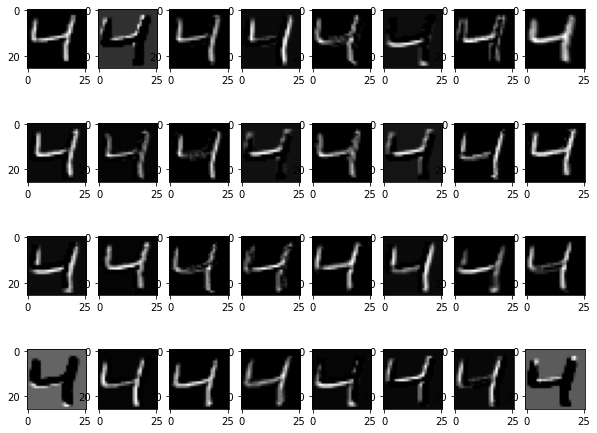

In [15]:
visualize_conv_layer('conv_0')

1/1 [==============================] - 0s 53ms/step
(1, 24, 24, 64)


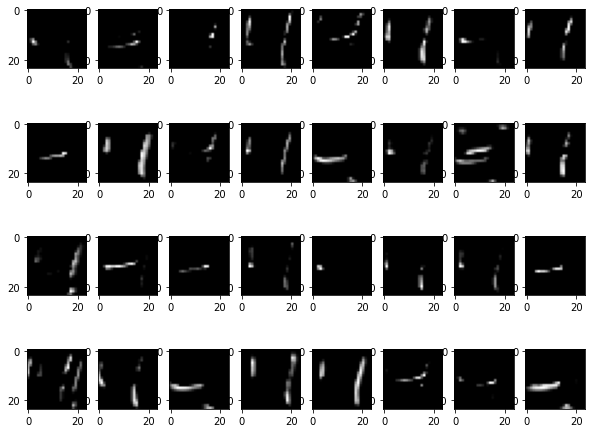

In [16]:
visualize_conv_layer('conv_1')